In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.sql.types import DateType
from pyspark.sql.functions import to_date
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Ganti 'nama_file.csv' dengan nama sebenarnya file dataset Anda
df = pd.read_csv('proyeksi.csv')

In [4]:
print(df.head())

   id  kode_provinsi nama_provinsi  kode_kabupaten_kota nama_kabupaten_kota  \
0   1             32    JAWA BARAT                 3201     KABUPATEN BOGOR   
1   2             32    JAWA BARAT                 3201     KABUPATEN BOGOR   
2   3             32    JAWA BARAT                 3201     KABUPATEN BOGOR   
3   4             32    JAWA BARAT                 3201     KABUPATEN BOGOR   
4   5             32    JAWA BARAT                 3201     KABUPATEN BOGOR   

  kategori_usaha  proyeksi_jumlah_umkm satuan  tahun  
0      AKSESORIS                   927   UNIT   2017  
1          BATIK                   927   UNIT   2017  
2         BORDIR                   132   UNIT   2017  
3          CRAFT                 33111   UNIT   2017  
4        FASHION                 32316   UNIT   2017  


In [5]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    1350 non-null   int64 
 1   kode_provinsi         1350 non-null   int64 
 2   nama_provinsi         1350 non-null   object
 3   kode_kabupaten_kota   1350 non-null   int64 
 4   nama_kabupaten_kota   1350 non-null   object
 5   kategori_usaha        1350 non-null   object
 6   proyeksi_jumlah_umkm  1350 non-null   int64 
 7   satuan                1350 non-null   object
 8   tahun                 1350 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 95.1+ KB
None
                id  kode_provinsi  kode_kabupaten_kota  proyeksi_jumlah_umkm  \
count  1350.000000         1350.0          1350.000000           1350.000000   
mean    675.500000           32.0          3231.333333          20627.588148   
std     389.855743            0.0            31.

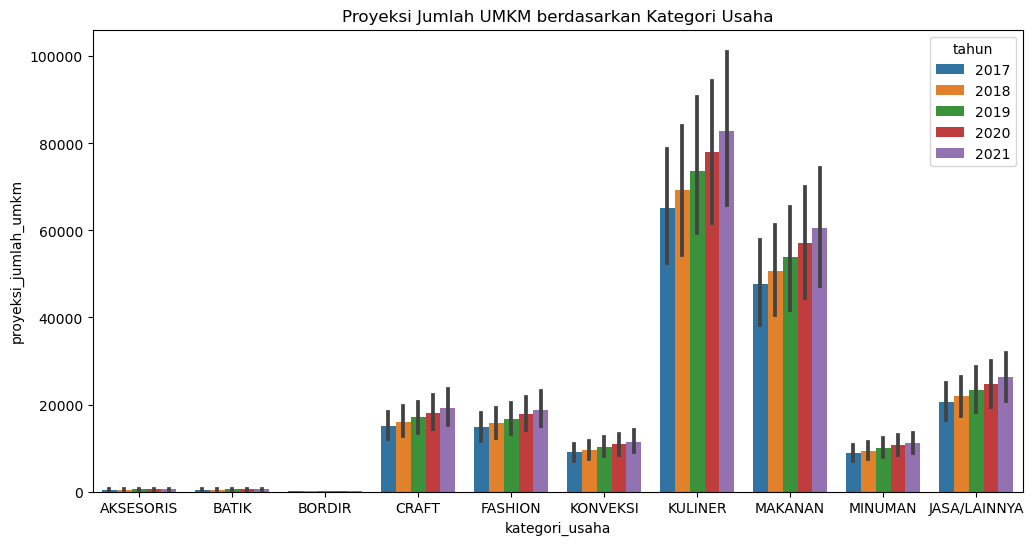

In [6]:
# Contoh: Bar plot untuk proyeksi jumlah UMKM berdasarkan kategori usaha
plt.figure(figsize=(12, 6))
sns.barplot(x='kategori_usaha', y='proyeksi_jumlah_umkm', data=df, hue='tahun')
plt.title('Proyeksi Jumlah UMKM berdasarkan Kategori Usaha')
plt.show()

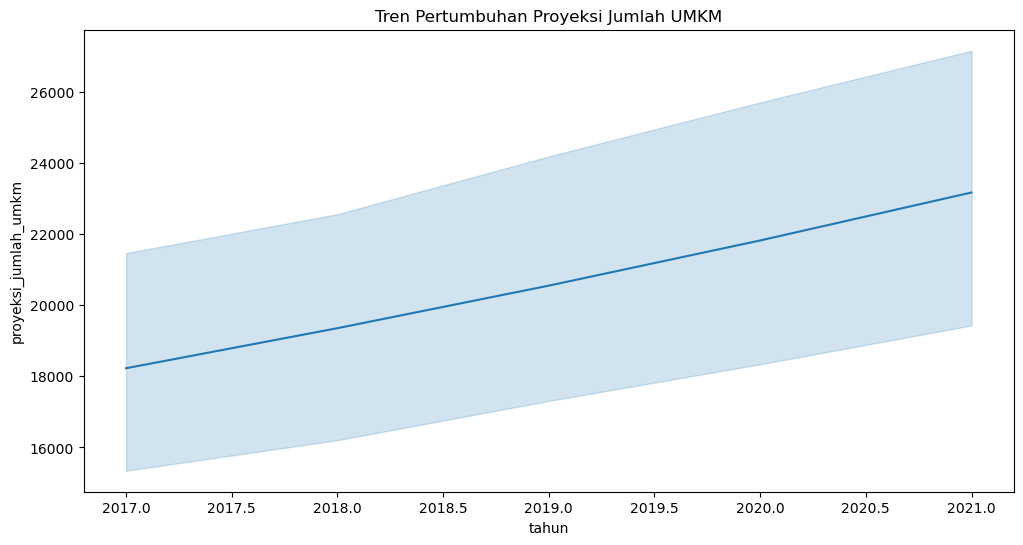

In [8]:
# Contoh: Tren pertumbuhan proyeksi jumlah UMKM secara umum
plt.figure(figsize=(12, 6))
sns.lineplot(x='tahun', y='proyeksi_jumlah_umkm', data=df)
plt.title('Tren Pertumbuhan Proyeksi Jumlah UMKM')
plt.show()


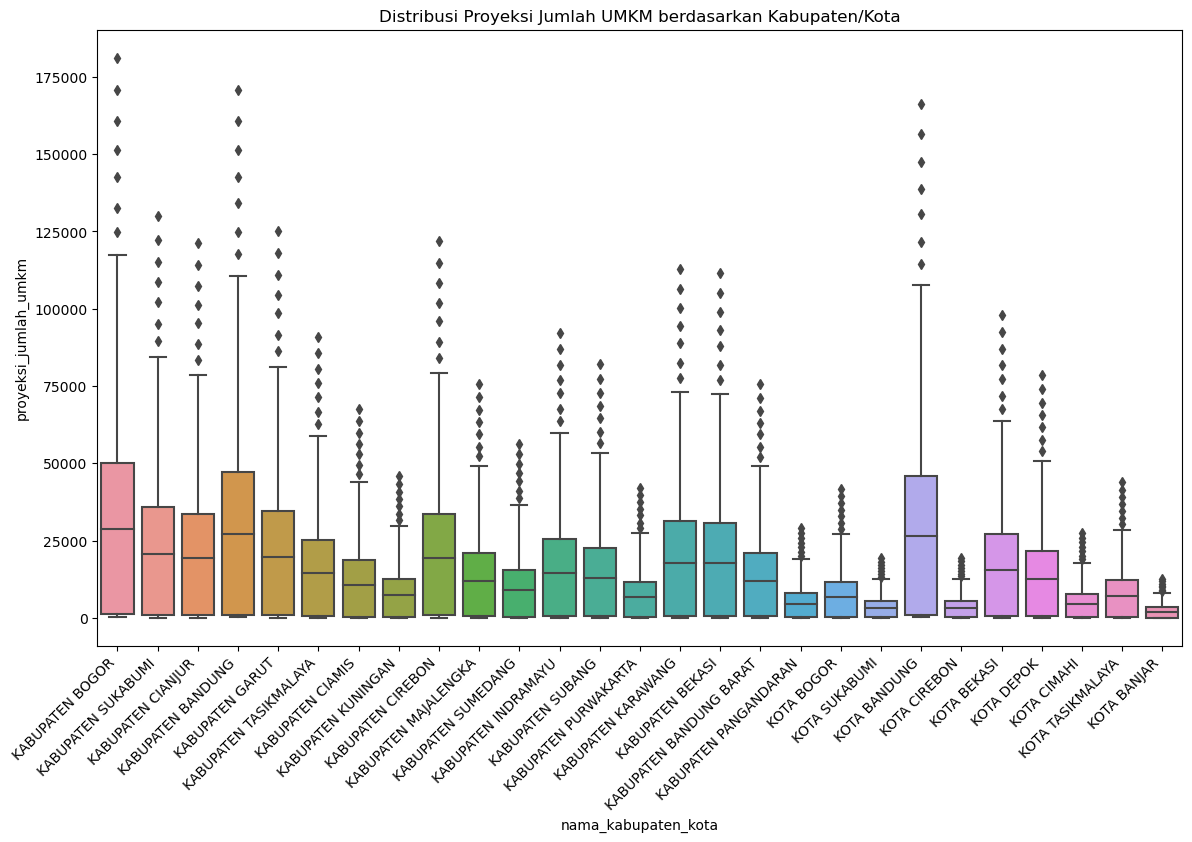

In [9]:
# Contoh: Box plot distribusi proyeksi jumlah UMKM berdasarkan kabupaten/kota
plt.figure(figsize=(14, 8))
sns.boxplot(x='nama_kabupaten_kota', y='proyeksi_jumlah_umkm', data=df)
plt.title('Distribusi Proyeksi Jumlah UMKM berdasarkan Kabupaten/Kota')
plt.xticks(rotation=45, ha='right')
plt.show()


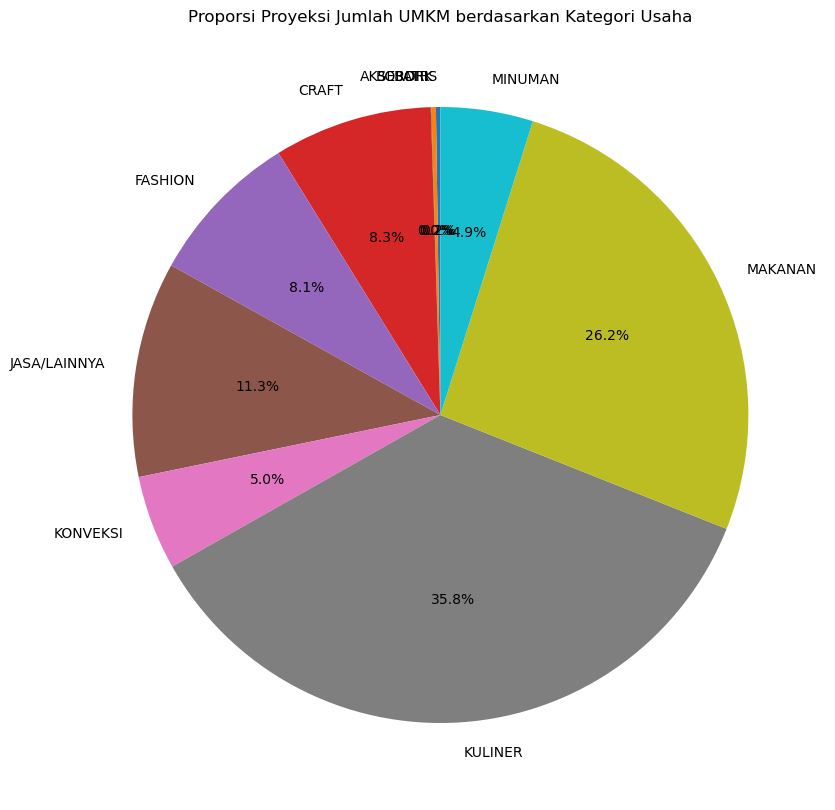

In [10]:
# Contoh: Pie chart proporsi proyeksi jumlah UMKM berdasarkan kategori usaha
plt.figure(figsize=(10, 10))
df_kategori_usaha = df.groupby('kategori_usaha')['proyeksi_jumlah_umkm'].sum().reset_index()
plt.pie(df_kategori_usaha['proyeksi_jumlah_umkm'], labels=df_kategori_usaha['kategori_usaha'], autopct='%1.1f%%', startangle=90)
plt.title('Proporsi Proyeksi Jumlah UMKM berdasarkan Kategori Usaha')
plt.show()


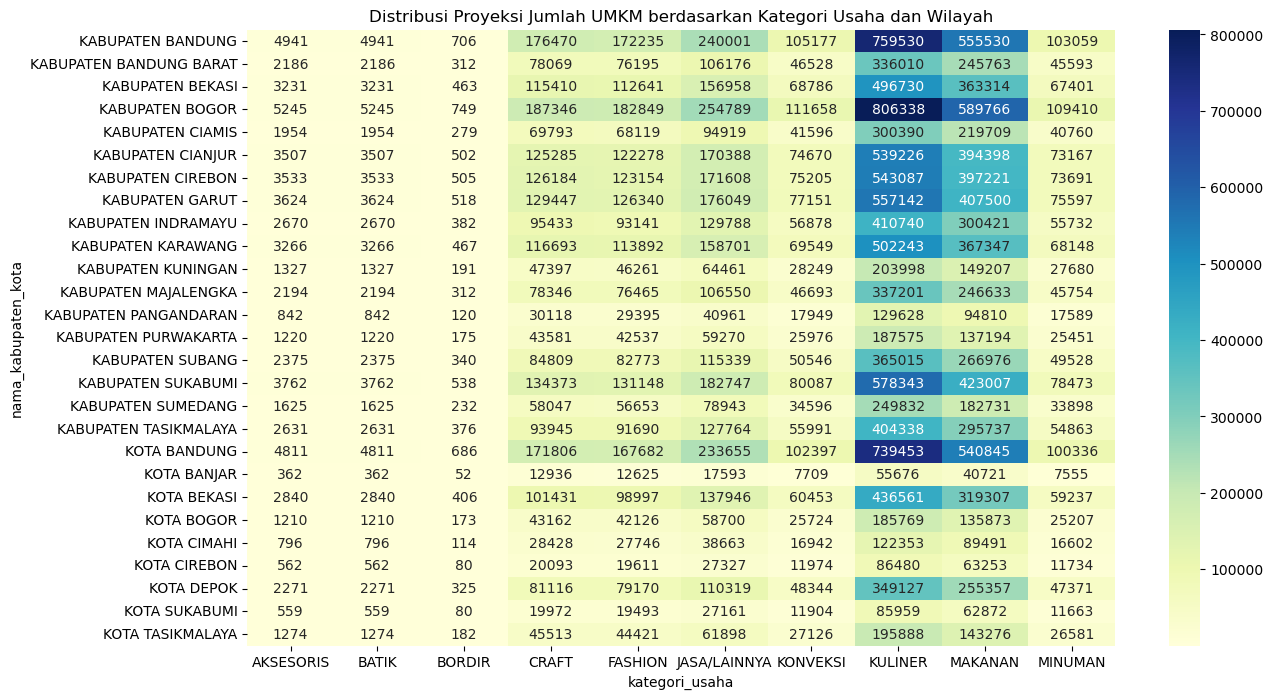

In [11]:
# Contoh: Heatmap untuk distribusi proyeksi jumlah UMKM berdasarkan kategori usaha dan wilayah
pivot_table = pd.pivot_table(df, values='proyeksi_jumlah_umkm', index='nama_kabupaten_kota', columns='kategori_usaha', aggfunc='sum', fill_value=0)
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='g')
plt.title('Distribusi Proyeksi Jumlah UMKM berdasarkan Kategori Usaha dan Wilayah')
plt.show()


In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

# Contoh data prediksi dan data aktual (gantilah dengan data aktual dan prediksi yang sesuai)
data_prediksi = model.predict(X_test)
data_aktual = y_test

# Hitung MSE, RMSE, dan R2
mse = mean_squared_error(data_aktual, data_prediksi)
rmse = sqrt(mse)
r2 = r2_score(data_aktual, data_prediksi)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')


Mean Squared Error (MSE): 16169697.274074074
Root Mean Squared Error (RMSE): 4021.156211100742
R-squared (R2): 0.977518050781156
